In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

grand centre ca
atuona pf
bahawalpur pk
albany au
sosva ru
vao nc
rio grande br
atar mr
port alfred za
punta arenas cl
jamestown sh
provideniya ru
punta arenas cl
hovd mn
belaya gora ru
port alfred za
mar del plata ar
rikitea pf
avarua ck
ratnagiri in
kilmez ru
virginia beach us
jinchengjiang cn
tasiilaq gl
kinkala cg
cape town za
cape town za
port alfred za
ponta do sol cv
tessalit ml
kloulklubed pw
razdolnoye ua
belyy yar ru
bathsheba bb
santana do livramento br
shimoda jp
bluff nz
baisha cn
rikitea pf
lewistown us
qaanaaq gl
kapaa us
palimbang ph
codrington ag
koppang no
berlevag no
tessalit ml
port moresby pg
yellowknife ca
new norfolk au
hermanus za
victoria sc
illoqqortoormiut gl
pathein mm
cidreira br
dunedin nz
cabo san lucas mx
busselton au
east london za
qaanaaq gl
praia da vitoria pt
faya td
airai pw
cabo san lucas mx
lompoc us
barrow us
khatanga ru
kawalu id
talnakh ru
katsuura jp
mataura pf
inhambane mz
rio gallegos ar
khatanga ru
victoria sc
portland au
abu dhabi ae
plett

puerto ayora ec
arraial do cabo br
rikitea pf
san rafael ar
busselton au
tasiilaq gl
nizhneyansk ru
inirida co
mount gambier au
maniitsoq gl
hilo us
arraial do cabo br
tuktoyaktuk ca
bogovarovo ru
mataura pf
umm lajj sa
atuona pf
amderma ru
inirida co
ushuaia ar
voka ee
saleaula ws
kostenec bg
albany au
bastrop us
mataura pf
kochi in
mataura pf
thompson ca
luderitz na
albany au
tsihombe mg
arraial do cabo br
bluff nz
punta arenas cl
vaini to
thinadhoo mv
camacha pt
sorong id
hilo us
lolua tv
biak id
saint-michel-des-saints ca
saint-augustin ca
albany au
ushuaia ar
ushuaia ar
tasiilaq gl
bengkulu id
pilar ph
sentyabrskiy ru
hithadhoo mv
bolshiye uki ru
mataura pf
exeter us
taolanaro mg
saleaula ws
port alfred za
busselton au
tasiilaq gl
thompson ca
olafsvik is
vaitupu wf
dalvik is
matata nz
yellowknife ca
punta arenas cl
chaplygin ru
airai pw
xiashi cn
barrow us
castro cl
brokopondo sr
rikitea pf
grindavik is
albany au
keti bandar pk
georgetown sh
rio grande br
yellowknife ca
nieuw amst

In [6]:
import requests

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [11]:
import requests

from config import weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | grand centre
City not found. Skipping...
Processing Record 2 of Set 12 | atuona
Processing Record 3 of Set 12 | bahawalpur
Processing Record 4 of Set 12 | albany
Processing Record 5 of Set 12 | sosva
Processing Record 6 of Set 12 | vao
Processing Record 7 of Set 12 | rio grande
Processing Record 8 of Set 12 | atar
Processing Record 9 of Set 12 | port alfred
Processing Record 10 of Set 12 | punta arenas
Processing Record 11 of Set 12 | jamestown
Processing Record 12 of Set 12 | provideniya
Processing Record 13 of Set 12 | hovd
Processing Record 14 of Set 12 | belaya gora
Processing Record 15 of Set 12 | mar del plata
Processing Record 16 of Set 12 | rikitea
Processing Record 17 of Set 12 | avarua
Processing Record 18 of Set 12 | ratnagiri
Processing Record 19 of Set 12 | kilmez
City not found. Skipping...
Processing Record 20 of Set 12 | virginia beach
Processing Record 21 of Set 12 | jinchengjia

Processing Record 34 of Set 15 | polson
Processing Record 35 of Set 15 | peleduy
Processing Record 36 of Set 15 | barcelos
Processing Record 37 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 38 of Set 15 | avera
Processing Record 39 of Set 15 | longyearbyen
Processing Record 40 of Set 15 | kuche
City not found. Skipping...
Processing Record 41 of Set 15 | luanda
Processing Record 42 of Set 15 | insch
Processing Record 43 of Set 15 | solovetskiy
City not found. Skipping...
Processing Record 44 of Set 15 | noumea
Processing Record 45 of Set 15 | thinadhoo
Processing Record 46 of Set 15 | souillac
Processing Record 47 of Set 15 | upernavik
Processing Record 48 of Set 15 | saleaula
City not found. Skipping...
Processing Record 49 of Set 15 | wulanhaote
City not found. Skipping...
Processing Record 50 of Set 15 | likasi
Processing Record 1 of Set 16 | mercedes
Processing Record 2 of Set 16 | nikolskoye
Processing Record 3 of Set 16 | esperance
Processing Record 4 of Set

Processing Record 19 of Set 19 | oriximina
Processing Record 20 of Set 19 | opuwo
Processing Record 21 of Set 19 | puerto leguizamo
Processing Record 22 of Set 19 | mayo
Processing Record 23 of Set 19 | konstantinovka
Processing Record 24 of Set 19 | margate
Processing Record 25 of Set 19 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 19 | yarke pole
Processing Record 27 of Set 19 | mason city
Processing Record 28 of Set 19 | san rafael
Processing Record 29 of Set 19 | inirida
Processing Record 30 of Set 19 | mount gambier
Processing Record 31 of Set 19 | maniitsoq
Processing Record 32 of Set 19 | bogovarovo
Processing Record 33 of Set 19 | umm lajj
Processing Record 34 of Set 19 | voka
Processing Record 35 of Set 19 | kostenec
City not found. Skipping...
Processing Record 36 of Set 19 | bastrop
Processing Record 37 of Set 19 | kochi
Processing Record 38 of Set 19 | luderitz
Processing Record 39 of Set 19 | camacha
Processing Record 40 of Set 19 | sorong
Processing 

Processing Record 2 of Set 23 | grand-santi
Processing Record 3 of Set 23 | portoferraio
Processing Record 4 of Set 23 | berdigestyakh
Processing Record 5 of Set 23 | ventspils
Processing Record 6 of Set 23 | rawson
Processing Record 7 of Set 23 | bergkamen
Processing Record 8 of Set 23 | guerrero negro
Processing Record 9 of Set 23 | nouakchott
Processing Record 10 of Set 23 | dabeiba
Processing Record 11 of Set 23 | cherskiy
Processing Record 12 of Set 23 | panaba
Processing Record 13 of Set 23 | hofn
Processing Record 14 of Set 23 | sosnovo-ozerskoye
Processing Record 15 of Set 23 | tucurui
Processing Record 16 of Set 23 | haileybury
Processing Record 17 of Set 23 | roxana
Processing Record 18 of Set 23 | chor
Processing Record 19 of Set 23 | port blair
Processing Record 20 of Set 23 | new plymouth
Processing Record 21 of Set 23 | qaqortoq
Processing Record 22 of Set 23 | trinidad
Processing Record 23 of Set 23 | huainan
Processing Record 24 of Set 23 | san pedro
Processing Record 2

In [14]:
len(city_data)

548

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.25,67,6,15.57,PF,2021-10-26 19:04:41
1,Bahawalpur,29.4000,71.6833,75.09,32,1,7.38,PK,2021-10-26 19:00:15
2,Albany,42.6001,-73.9662,56.23,94,100,1.01,US,2021-10-26 19:00:24
3,Sosva,59.1766,61.8558,24.55,85,74,3.89,RU,2021-10-26 19:04:41
4,Vao,-22.6667,167.4833,71.87,85,100,14.03,NC,2021-10-26 19:04:41
5,Rio Grande,-32.0350,-52.0986,87.91,58,0,7.20,BR,2021-10-26 19:04:42
6,Atar,20.5169,-13.0499,90.09,24,21,10.36,MR,2021-10-26 19:04:42
7,Port Alfred,-33.5906,26.8910,66.51,83,79,29.57,ZA,2021-10-26 19:04:42
8,Punta Arenas,-53.1500,-70.9167,51.91,58,0,39.12,CL,2021-10-26 19:04:43
9,Jamestown,42.0970,-79.2353,44.19,99,90,8.99,US,2021-10-26 19:03:52


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-10-26 19:04:41,-9.8000,-139.0333,77.25,67,6,15.57
1,Bahawalpur,PK,2021-10-26 19:00:15,29.4000,71.6833,75.09,32,1,7.38
2,Albany,US,2021-10-26 19:00:24,42.6001,-73.9662,56.23,94,100,1.01
3,Sosva,RU,2021-10-26 19:04:41,59.1766,61.8558,24.55,85,74,3.89
4,Vao,NC,2021-10-26 19:04:41,-22.6667,167.4833,71.87,85,100,14.03


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635275232.1619859

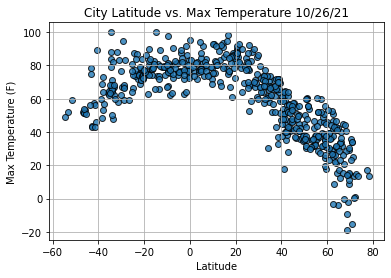

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

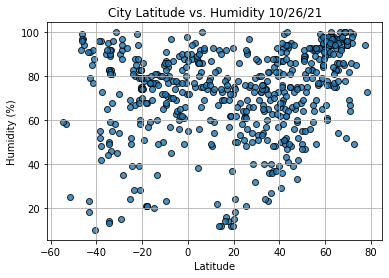

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

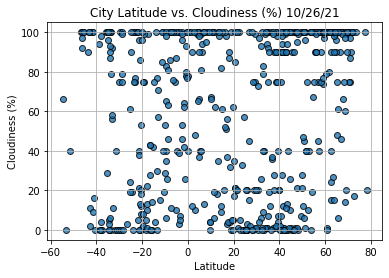

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

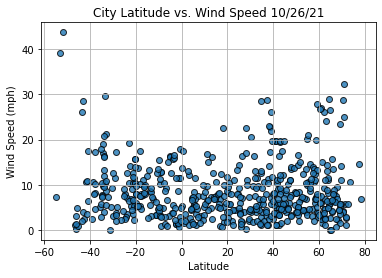

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2021-10-26 19:01:44
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    73.17
Humidity                       48
Cloudiness                      0
Wind Speed                   8.23
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
543     True
544    False
545     True
546     True
547    False
Name: Lat, Length: 548, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bahawalpur,PK,2021-10-26 19:00:15,29.4000,71.6833,75.09,32,1,7.38
2,Albany,US,2021-10-26 19:00:24,42.6001,-73.9662,56.23,94,100,1.01
3,Sosva,RU,2021-10-26 19:04:41,59.1766,61.8558,24.55,85,74,3.89
6,Atar,MR,2021-10-26 19:04:42,20.5169,-13.0499,90.09,24,21,10.36
9,Jamestown,US,2021-10-26 19:03:52,42.0970,-79.2353,44.19,99,90,8.99


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

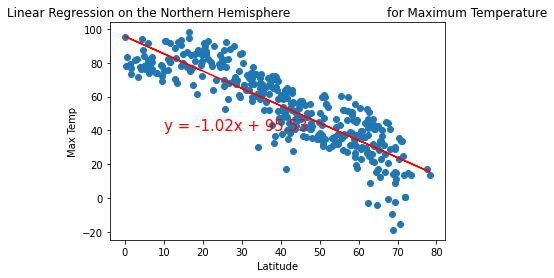

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

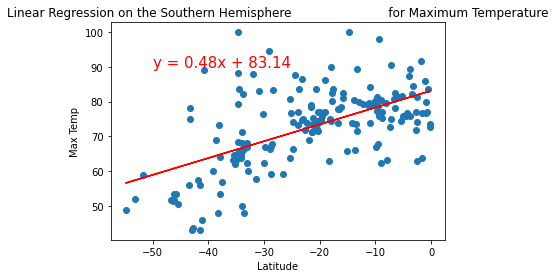

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

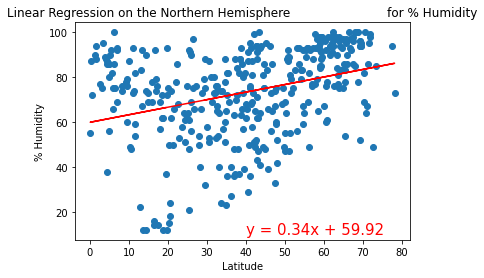

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

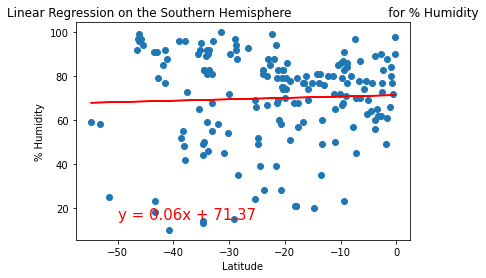

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

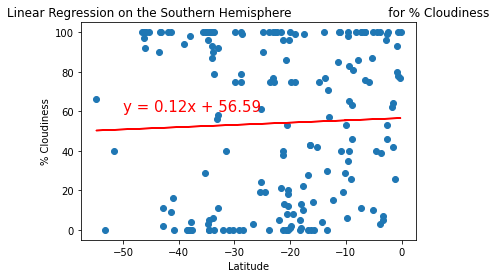

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

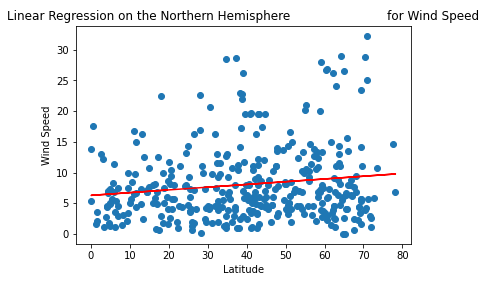

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

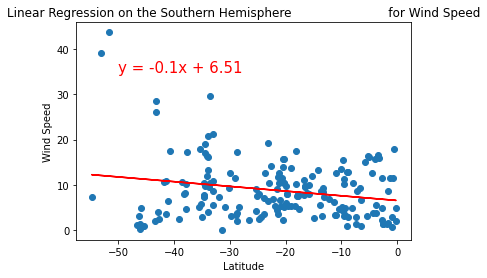

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))